In [3]:
import pandas as pd

train1 = pd.read_csv('train-1.csv')
train2 = pd.read_csv('train-2.csv')
train3 = pd.read_csv('train-3.csv')
TRAIN = pd.concat([train1, train2, train3], ignore_index=True)

test1 = pd.read_csv('test-1.csv')
test2 = pd.read_csv('test-2.csv')
test3 = pd.read_csv('test-3.csv')

In [4]:
X_train = TRAIN["Sentence"]
y_train = TRAIN["Label"]

X_train3 = train3["Sentence"]
y_train3 = train3["Label"]

X_test1 = test1["Sentence"]
y_test1 = test1["Label"]

X_test2 = test2["Sentence"]
y_test2 = test2["Label"]

X_test3 = test3["Sentence"]
y_test3 = test3["Label"]

In [5]:
stop_words_cro = [
    "a", "ako", "ali", "bi", "bih", "bila", "bili", "bilo", "bio", "bismo", "biste", "biti", "bumo",
    "da", "do", "duž", "ga", "hoće", "hoćemo", "hoćete", "hoćeš", "hoću", "i", "iako", "ih", "ili",
    "iz", "ja", "je", "jedna", "jedne", "jedno", "jer", "jesam", "jesi", "jesmo", "jest", "jeste",
    "jesu", "jim", "joj", "još", "ju", "kada", "kako", "kao", "koja", "koje", "koji", "kojima",
    "koju", "kroz", "li", "me", "mene", "meni", "mi", "mimo", "moj", "moja", "moje", "mu", "na",
    "nad", "nakon", "nam", "nama", "nas", "naš", "naša", "naše", "našeg", "ne", "nego", "neka",
    "neki", "nekog", "neku", "nema", "netko", "neće", "nećemo", "nećete", "nećeš", "neću", "nešto",
    "ni", "nije", "nikoga", "nikoje", "nikoju", "nisam", "nisi", "nismo", "niste", "nisu", "njega",
    "njegov", "njegova", "njegovo", "njemu", "njezin", "njezina", "njezino", "njih", "njihov",
    "njihova", "njihovo", "njim", "njima", "njoj", "nju", "no", "o", "od", "odmah", "on", "ona",
    "oni", "ono", "ova", "pa", "pak", "po", "pod", "pored", "prije", "s", "sa", "sam", "samo", "se",
    "sebe", "sebi", "si", "smo", "ste", "su", "sve", "svi", "svog", "svoj", "svoja", "svoje", "svom",
    "ta", "tada", "taj", "tako", "te", "tebe", "tebi", "ti", "to", "toj", "tome", "tu", "tvoj",
    "tvoja", "tvoje", "u", "uz", "vam", "vama", "vas", "vaš", "vaša", "vaše", "već", "vi", "vrlo",
    "za", "zar", "će", "ćemo", "ćete", "ćeš", "ću", "što"
]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words_cro, ngram_range=(1, 3))

X_train_vec = vectorizer.fit_transform(TRAIN["Sentence"])
X_train3_vec = vectorizer.transform(X_train3)

X_test1_vec = vectorizer.transform(X_test1)
X_test2_vec = vectorizer.transform(X_test2)
X_test3_vec = vectorizer.transform(X_test3)

1. metoda: SUPPORT VECTOR MACHINES

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [25]:
#TRAIN
svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svm.fit(X_train_vec, y_train)

y_pred1 = svm.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"SVM (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = svm.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"SVM (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = svm.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"SVM (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

SVM (Test-1, TRAIN): Precision=0.660, Recall=0.672, F1=0.665, Accuracy=0.672
SVM (Test-2, TRAIN): Precision=0.606, Recall=0.630, F1=0.610, Accuracy=0.630
SVM (Test-3, TRAIN): Precision=0.764, Recall=0.712, F1=0.702, Accuracy=0.712


In [24]:
#Train3
svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svm.fit(X_train3_vec, y_train3)

y_pred1 = svm.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"SVM (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = svm.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"SVM (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = svm.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"SVM (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

SVM (Test-1, Train-3): Precision=0.603, Recall=0.476, F1=0.509, Accuracy=0.476
SVM (Test-2, Train-3): Precision=0.593, Recall=0.495, F1=0.523, Accuracy=0.495
SVM (Test-3, Train-3): Precision=0.790, Recall=0.788, F1=0.785, Accuracy=0.788


2. metoda: XGBOOST

In [10]:
from xgboost import XGBClassifier

In [11]:
#TRAIN
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42, gamma=0.1)
xgb.fit(X_train_vec, y_train)

y_pred1 = xgb.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"XGB (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = xgb.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"XGB (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = xgb.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"XGB (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

XGB (Test-1, TRAIN): Precision=0.609, Recall=0.648, F1=0.618, Accuracy=0.648
XGB (Test-2, TRAIN): Precision=0.625, Recall=0.649, F1=0.597, Accuracy=0.649
XGB (Test-3, TRAIN): Precision=0.697, Recall=0.554, F1=0.518, Accuracy=0.554


In [18]:
#Train3
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, gamma=0)
xgb.fit(X_train3_vec, y_train3)

y_pred1 = xgb.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"XGB (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = xgb.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"XGB (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = xgb.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"XGB (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

XGB (Test-1, Train-3): Precision=0.567, Recall=0.502, F1=0.525, Accuracy=0.502
XGB (Test-2, Train-3): Precision=0.552, Recall=0.516, F1=0.527, Accuracy=0.516
XGB (Test-3, Train-3): Precision=0.682, Recall=0.653, F1=0.648, Accuracy=0.653


Confusion matrix:

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

In [16]:
svm.fit(X_train_vec, y_train)
y_pred1_svm = svm.predict(X_test1_vec)
y_pred2_svm = svm.predict(X_test2_vec)
y_pred3_svm = svm.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1_svm, "SVM TRAIN - Test 1")
plot_confusion_matrix(y_test2, y_pred2_svm, "SVM TRAIN - Test 2")
plot_confusion_matrix(y_test3, y_pred3_svm, "SVM TRAIN - Test 3")

svm.fit(X_train3_vec, y_train3)
y_pred1_svm = svm.predict(X_test1_vec)
y_pred2_svm = svm.predict(X_test2_vec)
y_pred3_svm = svm.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1_svm, "SVM Train3 - Test 1")
plot_confusion_matrix(y_test2, y_pred2_svm, "SVM Train3 - Test 2")
plot_confusion_matrix(y_test3, y_pred3_svm, "SVM Train3 - Test 3")

KeyboardInterrupt: 

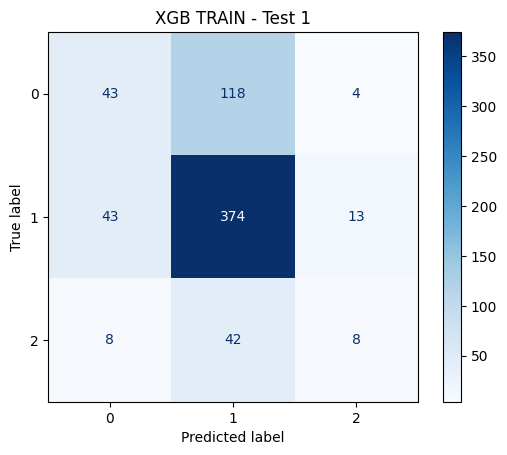

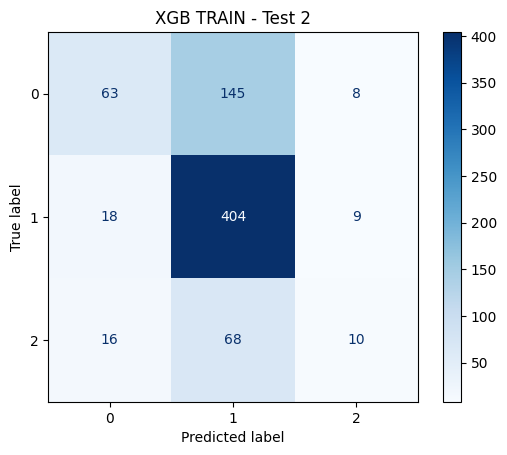

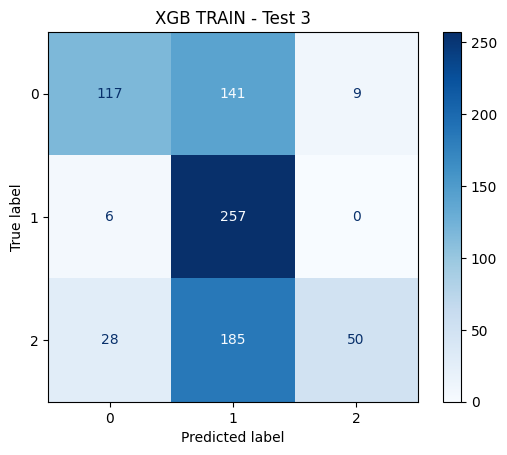

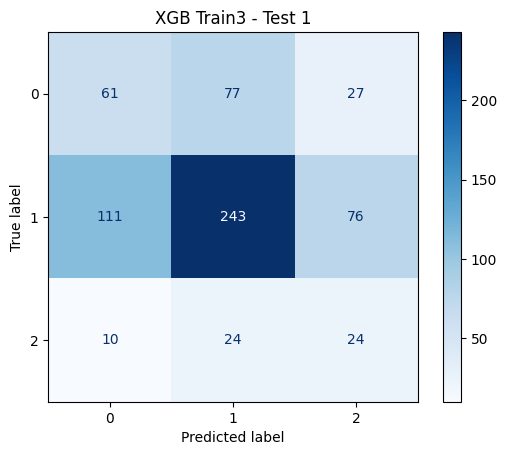

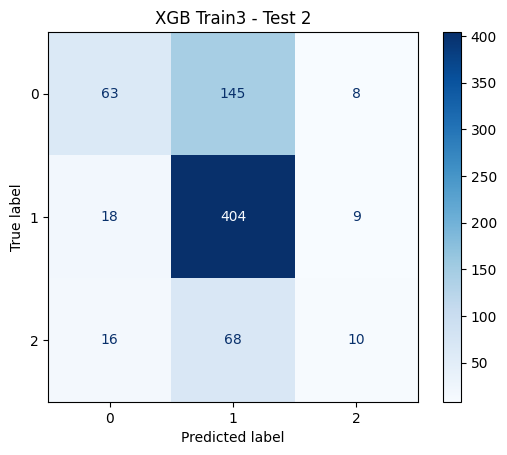

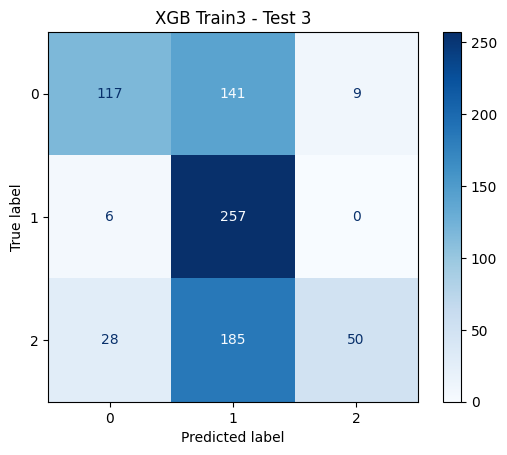

In [17]:
xgb.fit(X_train_vec, y_train)
y_pred1_xgb = xgb.predict(X_test1_vec)
y_pred2_xgb = xgb.predict(X_test2_vec)
y_pred3_xgb = xgb.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1_xgb, "XGB TRAIN - Test 1")
plot_confusion_matrix(y_test2, y_pred2_xgb, "XGB TRAIN - Test 2")
plot_confusion_matrix(y_test3, y_pred3_xgb, "XGB TRAIN - Test 3")

xgb.fit(X_train3_vec, y_train3)
y_pred1_xgb = xgb.predict(X_test1_vec)
y_pred2_ygb = xgb.predict(X_test2_vec)
y_pred3_ygb = xgb.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1_xgb, "XGB Train3 - Test 1")
plot_confusion_matrix(y_test2, y_pred2_xgb, "XGB Train3 - Test 2")
plot_confusion_matrix(y_test3, y_pred3_xgb, "XGB Train3 - Test 3")